# Yelp Data Challenge - Clustering and PCA



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('Dataset/pittsrestfinallast2year.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49142 entries, 0 to 49141
Data columns (total 13 columns):
Unnamed: 0     49142 non-null int64
business_id    49142 non-null object
name           49142 non-null object
categories     49142 non-null object
avg_stars      49142 non-null float64
cool           49142 non-null int64
date           49142 non-null object
funny          49142 non-null int64
review_id      49142 non-null object
stars          49142 non-null int64
text           49142 non-null object
useful         49142 non-null int64
user_id        49142 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 4.9+ MB


In [4]:
df.head()

,Unnamed: 0,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,2,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2016-10-05,0,isswD5jO3GwCYIkDNK9AEA,4,I love the white pizza and the Monongahela (bl...,0,D5_iQw0N9wO7kT7FrT7j6A
1,11,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-07-31,0,CRMppAp7f0GF5pa8sNkV4g,5,love Primanti bros.great food. good service. f...,0,nyzncOg3goSAMK15IijIqA
2,12,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-03-25,0,BdGR_xduQ2CLkEIgtR2eCQ,4,Great food and very convenient location. The p...,0,YFRp9i9sDuA1T5oMKq5cbg
3,18,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-12-31,0,Jt2iThRe8Fu6GAG-moAIPQ,3,I love visiting Primanti Bros every time we co...,0,QqdHAP9tSwjteG7b9q7sAw
4,20,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2016-09-27,0,1mi5-2nKgRQ0u6KoWXA3vQ,5,You can't beat their happy hour! Great sandwic...,0,4qfMMlGtme2RNFqDgxYLxg


## 1. Cluster the review text data for all the restaurants in Pittsbrugh

### Define feature variables -- the text of the review

In [5]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents= df['text'].values

### Define your target variable (any categorical variable that may be meaningful)

#### We are interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [6]:
# Make a column and take the values, save to a variable named "target"
df['target'] = df['stars'] == 5
target = df['target'].values

#### Look at the statistic of the target variable

In [7]:
# To be implemented
target.mean(), target.size, target.std()

(0.43235928533637213, 49142, 0.49540360689017365)

### Create training dataset and test dataset

In [8]:
from sklearn.cross_validation import train_test_split

/home/cs7532018fall/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Now split the data to training set and test set
documents_train, documents_test, target_train, target_test = train_test_split(
documents, target, test_size = 0.3, random_state = 42)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, 1000
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 2000)

In [12]:
# Train the model with your training data
vectors_train = vectorizer.fit_transform(documents_train).toarray()

In [13]:
vectors_train.shape

(34399, 2000)

In [14]:
vectors_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# Get the vocab of tfidf
words = vectorizer.get_feature_names()

In [16]:
len(words)

2000

In [17]:
# Use the trained model to transform all the reviews
vectors_documents = vectorizer.transform(documents).toarray()

In [18]:
len(vectors_documents)

49142

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [19]:
from time import time
begin = time()

from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(vectors_train)

end = time()
print(kmeans)
print((end - begin)/60)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
4.363171168168386


#### Make predictions on all your data

In [20]:
assigned_cluster = kmeans.predict(vectors_documents)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [21]:

print("cluster centers:")
print(kmeans.cluster_centers_)

cluster centers:
[[0.0027098  0.00687865 0.00127969 ... 0.00464514 0.00097103 0.00249641]
 [0.00157161 0.00492177 0.0015517  ... 0.00396457 0.00077666 0.00075782]
 [0.00330819 0.00642253 0.0010948  ... 0.00310172 0.00066101 0.00063042]
 ...
 [0.00137662 0.00584649 0.00177428 ... 0.00345359 0.0007005  0.00169444]
 [0.00405851 0.01983362 0.00136472 ... 0.00093462 0.00343309 0.0002059 ]
 [0.00196515 0.00595776 0.00205189 ... 0.00465512 0.00021143 0.00049395]]


#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [22]:

top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-11:-1]
print("top 10 features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(words[i] for i in centroid)))

top 10 features for each cluster:
0: chicken, good, ordered, sauce, got, food, salad, really, like, just
1: food, place, good, service, best, ve, pittsburgh, like, delicious, love
2: burger, fries, sandwich, good, cheese, place, burgers, great, food, got
3: great, food, service, place, good, atmosphere, beer, amazing, staff, friendly
4: thai, pad, curry, food, noodles, good, spicy, place, chicken, best
5: pizza, crust, good, cheese, sauce, place, great, delivery, best, like
6: minutes, food, order, table, service, time, came, asked, just, wait
7: tacos, taco, good, great, place, salsa, chips, queso, guacamole, food


#### Try different k
If you set k == to a different number, how does the top features change?

In [23]:
kmeansn5 = KMeans(n_clusters = 5)
kmeansn5.fit(vectors_train)
assigned_cluster = kmeansn5.predict(vectors_documents)

top_centroids = kmeansn5.cluster_centers_.argsort()[:, -1:-11:-1]
print("top 10 features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ",".join(words[i] for i in centroid)))

top 10 features for each cluster:
0: tacos,taco,good,great,place,salsa,chips,queso,guacamole,really
1: great,food,service,place,good,atmosphere,friendly,staff,amazing,love
2: food,order,minutes,time,service,table,just,came,bar,wait
3: pizza,crust,good,cheese,sauce,place,great,delivery,best,like
4: good,place,food,chicken,like,really,delicious,just,ordered,ve


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [24]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_documents.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 1, replace=False)
    print("cluster %d:" % i)
    for review in sample_reviews:
        print("    %s" % df.loc[review]['text'])

cluster 0:
    Hands down Bakersfield has the best guac in the city. Their queso and drinks are also really good. Past this their food In my opinion isn't good enough. Get a salad or a sandwich style dinner here but don't waste your time with the tacos. They're really unimpressive
cluster 1:
    Great and polite staff! The food was overall very good. This was my 2nd time eating breakfast here. Great options as far as food choices and I must say the breakfast burrito looks awesome. The only negative thing I didn't like is they used canned mushrooms in their omelets which didn't taste good nor blend well with the other fresh vegetables in the omelet. Other than that,  I would definitely return. Small spacing and usually crowded on Sunday.
cluster 2:
    Industry is a really unique place in Lawrenceville, known for its wide variety of available whiskey's. I have been on multiple occasions for both drinks and food and have been pleased each time.

The space itself is quite large, but it fi

ValueError: a must be non-empty

## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [25]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
df_top_restaurant = df['name'].value_counts().index[0]
df_top_restaurant

'Primanti Bros'

We can also load restaurant profile information from the business dataset (optional)

In [26]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile
df_top_restaurant = df[df['name'] == df_top_restaurant].copy().reset_index()
df_top_restaurant

,index,Unnamed: 0,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,target
0,0,2,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2016-10-05,0,isswD5jO3GwCYIkDNK9AEA,4,I love the white pizza and the Monongahela (bl...,0,D5_iQw0N9wO7kT7FrT7j6A,False
1,1,11,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-07-31,0,CRMppAp7f0GF5pa8sNkV4g,5,love Primanti bros.great food. good service. f...,0,nyzncOg3goSAMK15IijIqA,True
2,2,12,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-03-25,0,BdGR_xduQ2CLkEIgtR2eCQ,4,Great food and very convenient location. The p...,0,YFRp9i9sDuA1T5oMKq5cbg,False
3,3,18,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-12-31,0,Jt2iThRe8Fu6GAG-moAIPQ,3,I love visiting Primanti Bros every time we co...,0,QqdHAP9tSwjteG7b9q7sAw,False
4,4,20,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2016-09-27,0,1mi5-2nKgRQ0u6KoWXA3vQ,5,You can't beat their happy hour! Great sandwic...,0,4qfMMlGtme2RNFqDgxYLxg,True
5,5,23,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,1,2016-10-27,1,6prhTqu7nAf2g0JZjPM-AQ,4,Whoa! What a sandwich! This spot was recommend...,1,65GY-LY1Y9OLQ24bk05VYg,False
6,6,25,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-05-10,1,ahlonBc-iMSNbmRF85S6Tw,2,"Oh, what can I say about Primanti Bros. \nMy h...",0,ynQWcEUSahZ9uegM9kE9Qw,False
7,7,26,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2017-12-09,0,-nx4S8G5HUkI-h-z-T60oQ,5,This place was really good. We went based on a...,1,qmO1jsUwOSSIE9eAOryuZw,True
8,8,32,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2016-11-08,0,f54ybPsxQD6bTEOjra31RQ,2,"I used to love primanti's bros, but I wish the...",0,0Amd1mZAzHhHMbgKd2RuOg,False
9,9,36,--ujyvoQlwVoBgMYtADiLA,Primanti Bros,"Sandwiches, Sports Bars, Restaurants, Nightlif...",3.5,0,2016-10-11,0,JpIa-KOKBV1HpdcaI7v_3Q,1,I just moved to the Pittsburgh area and could ...,1,uHyE6oz8dXTYCQ087JQYEA,False


### Vectorize the text feature

In [27]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values
documents_top_restaurant.shape

(627,)

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [28]:
df_top_restaurant['target'] = df_top_restaurant['stars'] == 5
target_top_restaurant = df_top_restaurant['target'].values
target_top_restaurant[:5]

array([False,  True, False, False,  True])

#### Check the statistic of the target variable

In [29]:
# To be implemented
len(target_top_restaurant), target_top_restaurant.mean(), target_top_restaurant.std()

(627, 0.3237639553429027, 0.4679111631107145)

### Create training dataset and test dataset

In [30]:
from sklearn.cross_validation import train_test_split

In [31]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now data is smaller, use a typical "test_size", e.g. 0.3-0.7
X_train, X_test, y_train, y_test = train_test_split(
    documents_top_restaurant,
    target_top_restaurant,
test_size = 0.3, random_state = 42) 

### Get NLP representation of the documents

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 2000)

In [34]:
# Train the model with your training data
vector_train = vectorizer.fit_transform(X_train).toarray()

In [35]:
# Get the vocab of tfidf
words = vectorizer.get_feature_names()

In [36]:
# Use the trained model to transform the test data
vector_test = vectorizer.transform(X_test).toarray()

In [37]:
# Use the trained model to transform all the data
vector_documents_top_restaurant = vectorizer.transform(documents_top_restaurant).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [38]:

kmeans = KMeans()

kmeans.fit(vector_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all data

In [39]:
assigned_cluster = kmeans.predict(vector_documents_top_restaurant)

#### Inspect the centroids

In [40]:
print("cluster centers:")
print(kmeans.cluster_centers_)

cluster centers:
[[ 0.00000000e+00  2.60208521e-18  3.25260652e-19 ...  4.33680869e-19
   1.22610389e-02  1.62630326e-19]
 [ 3.69999246e-03  8.78040922e-03  1.08420217e-19 ... -5.42101086e-19
   2.10285683e-03 -4.87890978e-19]
 [ 4.33680869e-18  5.13605440e-03  0.00000000e+00 ... -5.42101086e-19
   3.67818338e-03 -5.42101086e-19]
 ...
 [ 3.94736382e-03  5.94739668e-04  0.00000000e+00 ...  2.25680749e-03
  -1.30104261e-18  2.48351405e-03]
 [ 3.03576608e-18 -1.73472348e-18  3.25260652e-19 ...  3.25260652e-19
   1.30104261e-18 -1.08420217e-19]
 [ 3.62827725e-03  5.89220470e-03  2.52406138e-03 ...  1.72048542e-03
   3.01603673e-03 -3.79470760e-19]]


#### Find the top 10 features for each cluster.

In [41]:
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-11:-1]
print("top 10 features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(words[i] for i in centroid)))

top 10 features for each cluster:
0: great, food, service, buffalo, good, vibe, bar, town, time, chicken
1: location, food, great, ve, love, service, primanti, primantis, minutes, good
2: primanti, like, fries, sandwiches, pittsburgh, bros, sandwich, food, just, eat
3: happy, hour, great, beat, specials, sandwiches, work, popular, pizza, good
4: food, service, good, recommend, delicious, highly, fast, sandwich, night, egg
5: sandwich, fries, good, pittsburgh, coleslaw, meat, place, cheese, really, bread
6: burger, fries, chili, pitts, sandwich, slaw, good, definitely, like, tasty
7: sandwich, pittsburgh, good, fries, best, bread, sandwiches, pastrami, place, slaw


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [42]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vector_documents_top_restaurant.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 1, replace=False)
    print("cluster %d:" % i)
    for review in sample_reviews:
        print("    %s" % df_top_restaurant.loc[review]['text'])

cluster 0:
    Place is great. Kind of small though. Food is great but the bread to meat ratio is janked.
cluster 1:
    I've been here more times than the Steelers have won AFC Championships and Super Bowls. I love this Primanti's the best because it has the most nostalgia and the sandwiches here always seem to taste better. It's a great environment and the employees rock. Stop by and grab a Pittsburgher Cheese Steak with egg and a Iron City beer the next time you're in the Steel City. Yinz Rock!!!
cluster 2:
    The one constant recommendation on our trip to Pittsburgh was to make a stop at Primanti Bros. Before they opened at 10am, a line was already starting to form. They've got a great selection of sandwiches, service was quick, and prices were reasonable. The restaurant quickly became over-run with Steelers fans and the big screen televisions hyping the games were everywhere. Portions are huge and while not your healthiest option, this is certainly a Pittsburgh staple worth check

## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(vector_train)
X_test_scaled = scaler.transform(vector_test)

### Use PCA to transform data (train and test) and get princial components

In [44]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50

pca = PCA(n_components = n_components)

X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)


In [45]:
X_train_pca.shape, X_test_pca.shape, pca.components_.shape

((438, 50), (189, 50), (50, 2000))

### See how much (and how much percentage of) variance the principal components explain

In [46]:
print (pca.explained_variance_[:20])

[18.71776482 17.67600882 16.60924957 15.89760474 14.46254874 14.22297832
 14.12248212 13.79889475 13.20067533 12.88783315 12.64627501 12.52120676
 12.29199537 11.83792616 11.56300308 11.11361493 11.04183058 10.75581169
 10.65987661 10.46491749]


In [47]:
print (pca.explained_variance_ratio_[:20])

[0.00933752 0.00881783 0.00828566 0.00793065 0.00721476 0.00709525
 0.00704512 0.0068837  0.00658527 0.0064292  0.0063087  0.00624631
 0.00613197 0.00590545 0.0057683  0.00554412 0.00550831 0.00536563
 0.00531777 0.00522051]


### Viz: plot proportion of variance explained with top principal components

For clear display, start with plotting <=20 principal components

Text(0,0.5,'plot proportion of variance explained')

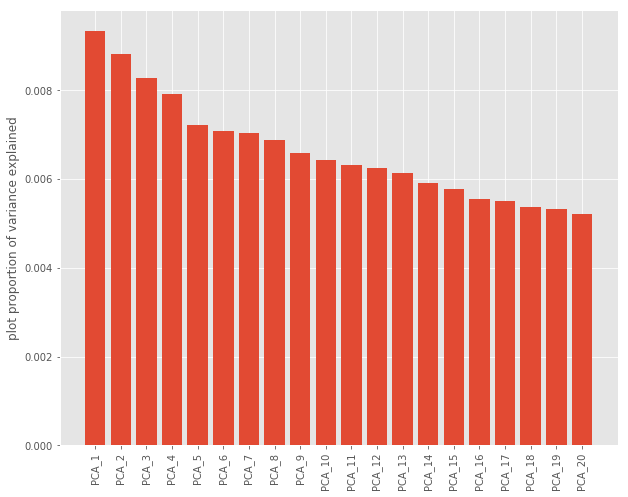

In [48]:
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_name = ['PCA_%s' % i for i in pca_range]

plt.figure(figsize = (10, 8))
plt.bar(pca_range, pca.explained_variance_ratio_[:n_col_to_display])
xticks = plt.xticks(pca_range, pca_name, rotation = 90)
plt.ylabel('plot proportion of variance explained')


## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [49]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

model_lrc = LogisticRegression()

model_lrc.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
model_lrc.score(X_train_scaled, y_train)

1.0

In [51]:
model_lrc.score(X_test_scaled, y_test)

0.7142857142857143

#### Use (Stardardized + PCA) tf-idf vectors as features

In [52]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

model_lrc = LogisticRegression()

model_lrc.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
model_lrc.score(X_train_pca, y_train)

0.7351598173515982

In [54]:
model_lrc.score(X_test_pca, y_test)

0.6825396825396826

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

After PCA preprocessing, training score decrease and test score increase.

Training score decrease because that without PCA preprocessing, the model is overfitting so that have a high training score and low test score. PCA reduce the number of features to reduce the negative impact of overfitting, thus reduce the training score while increase the test score.

#### You can plot the coefficients against principal components


In [55]:
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PCA_%s' % i for i in pca_range]
df_coefs = pd.DataFrame(list(zip(pca_names, model_lrc.coef_.flatten()))).sort_values(by = [1], ascending = False)
df_coefs.columns = ["PCAs", "coef"]
df_coefs[:5]

,PCAs,coef
10,PCA_11,0.144853
38,PCA_39,0.139541
22,PCA_23,0.131113
3,PCA_4,0.119876
41,PCA_42,0.117055


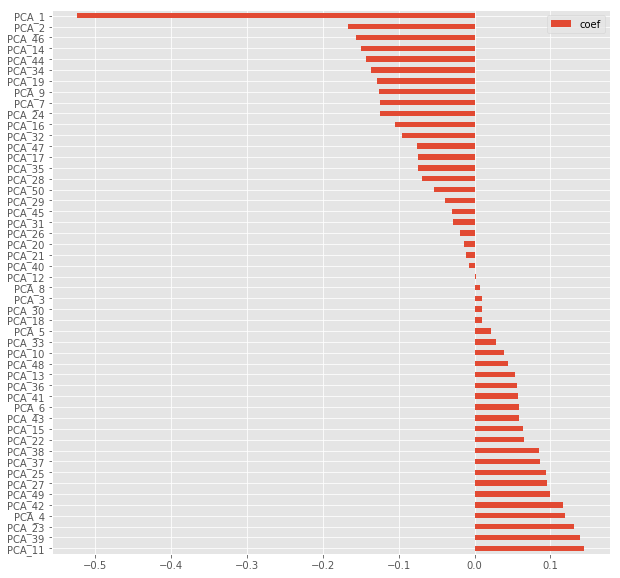

In [56]:
ax = df_coefs.plot.barh(figsize = (10, 10))
t= np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coefs['PCAs'])
plt.show()

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [57]:
# Build a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(max_depth = 25, n_estimators = 200, random_state = 42)

model_rfc.fit(X_train_scaled, y_train)

/home/cs7532018fall/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [58]:
# Get score for training set
model_rfc.score(X_train_scaled, y_train)

0.9863013698630136

In [59]:
# Get score for test set
model_rfc.score(X_test_scaled, y_test)

0.708994708994709

#### Use (Stardardized + PCA) tf-idf vectors as features

In [60]:
# Build a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(max_depth = 25, n_estimators = 200, random_state = 42)

model_rfc.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [61]:
# Get score for training set
model_rfc.score(X_train_pca, y_train)

1.0

In [62]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_rfc.score(X_test_pca, y_test)

0.6772486772486772

#### Q: What do you see from the training result and the test result?

After PCA preprocessing, training score increase and test score decrease.

It's a odd because in common way, the negative impact of overfitting should be reduce after we perform PCA which reduces the dimension of features and get rid of collinear features, while negative impact of overfitting become stronger here.

I really dont know why? becasue of the sample size is too small?

#### You can plot the feature importances against principal components


In [63]:
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PCA_%s' % i for i in pca_range]
df_coefs = pd.DataFrame(list(zip(pca_names, model_rfc.feature_importances_))).sort_values(by = [1], ascending = True)
df_coefs.columns = ["PCAs", "coef"]
df_coefs[:5]

,PCAs,coef
46,PCA_47,0.013118
20,PCA_21,0.013931
41,PCA_42,0.014550
39,PCA_40,0.014745
4,PCA_5,0.014912


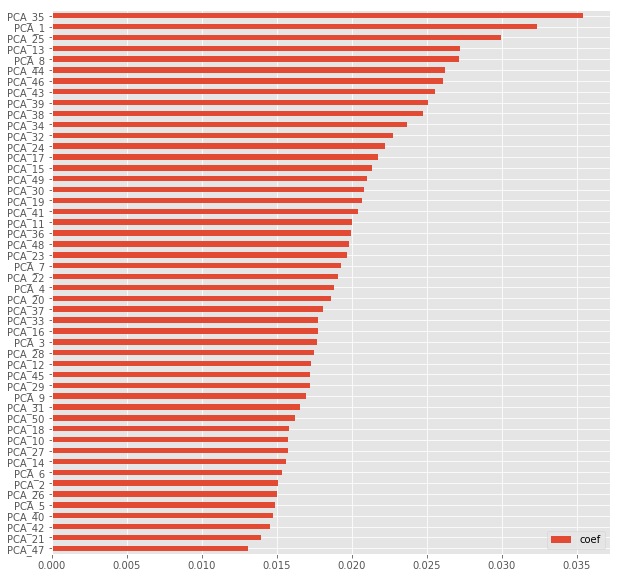

In [64]:
ax = df_coefs.plot.barh(figsize = (10, 10))
t= np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coefs['PCAs'])
plt.show()

## Cluster restaurants from their category information
A business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [65]:
documents = df['categories'].values
documents.shape, documents.dtype

((49142,), dtype('O'))

In [66]:
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
documents_train, documents_test = train_test_split(
    documents,
test_size = 0.7, random_state = 42)

In [67]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 500)

# Train the model with your training data
vectors_train = vectorizer.fit_transform(documents_train).toarray()

# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

# Use the trained model to transform all the reviews
vectors_documents = vectorizer.transform(documents).toarray()

In [68]:
# Fit k-means clustering on the training vectors and make predictions on all data

kmeans = KMeans()

kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [69]:
assigned_cluster = kmeans.predict(vectors_documents)

In [70]:
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-11:-1]
print("top 10 features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(words[i] for i in centroid)))

top 10 features for each cluster:
0: food, tea, coffee, restaurants, cafes, fast, breakfast, brunch, trucks, event
1: american, new, traditional, restaurants, burgers, mexican, seafood, sandwiches, steakhouses, gastropubs
2: bars, nightlife, american, cocktail, restaurants, new, traditional, sports, beer, pubs
3: breakfast, brunch, diners, american, traditional, restaurants, new, sandwiches, bars, nightlife
4: thai, noodles, restaurants, seafood, vegan, desserts, taiwanese, food, soup, salad
5: pizza, italian, restaurants, sandwiches, salad, delis, food, bars, nightlife, wine
6: restaurants, mexican, chinese, seafood, indian, burgers, mediterranean, latin, sandwiches, argentine
7: japanese, sushi, bars, asian, fusion, chinese, restaurants, ramen, korean, poke


In [71]:
# To be implemented

## Cluster categories from business entities. What does it mean by a cluster?


In [72]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents_name = df['name'].values
documents_name.shape, documents_name.dtype

((49142,), dtype('O'))

In [73]:
# Now split the data to training set and test set
# Now data is smaller, use a typical "test_size", e.g. 0.3-0.7
documents_name_train, documents_name_test = train_test_split(
    documents_name,
test_size = 0.3, random_state = 42) 

In [74]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer_name = TfidfVectorizer(stop_words = 'english', max_features = 500)

# Train the model with your training data
vectors_train_name = vectorizer_name.fit_transform(documents_train).toarray()

# Get the vocab of your tfidf
words_name = vectorizer_name.get_feature_names()

# Use the trained model to transform all the reviews
vectors_documents_name = vectorizer_name.transform(documents).toarray()

In [75]:
kmeans_name = KMeans()
kmeans_name.fit(vectors_train_name)
# Make predictions on all data
assigned_cluster = kmeans_name.predict(vectors_documents_name)

In [76]:
# Find the top 10 features for each cluster.
# To be implemented
top_n = 10
top_centroids = kmeans_name.cluster_centers_.argsort()[:, -1:-(top_n+1):-1]
print("top 10 features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(words_name[i] for i in centroid)))

top 10 features for each cluster:
0: event, planning, services, caterers, food, bars, spaces, venues, beer, american
1: bars, nightlife, american, restaurants, cocktail, new, traditional, pubs, sports, wine
2: pizza, italian, restaurants, salad, sandwiches, food, wings, chicken, gluten, free
3: restaurants, food, chinese, japanese, sushi, sandwiches, seafood, bars, mediterranean, indian
4: mexican, tacos, restaurants, bars, new, american, nightlife, cocktail, mex, tex
5: american, new, traditional, restaurants, burgers, steakhouses, gastropubs, sandwiches, food, seafood
6: breakfast, brunch, tea, coffee, food, cafes, restaurants, diners, american, traditional
7: thai, noodles, restaurants, desserts, seafood, vegan, sushi, fusion, asian, food


We notice the most used business names are very straight forword, telling the major business the entities are running.
While I don't think these clusters are meaningful in distinguishing each other.

## What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"?

In [77]:
# Find the top 10 features for each cluster.
# To be implemented
top_n = 10
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-(top_n+1):-1]
print("top 10 features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(words[i] for i in centroid)))

top 10 features for each cluster:
0: food, tea, coffee, restaurants, cafes, fast, breakfast, brunch, trucks, event
1: american, new, traditional, restaurants, burgers, mexican, seafood, sandwiches, steakhouses, gastropubs
2: bars, nightlife, american, cocktail, restaurants, new, traditional, sports, beer, pubs
3: breakfast, brunch, diners, american, traditional, restaurants, new, sandwiches, bars, nightlife
4: thai, noodles, restaurants, seafood, vegan, desserts, taiwanese, food, soup, salad
5: pizza, italian, restaurants, sandwiches, salad, delis, food, bars, nightlife, wine
6: restaurants, mexican, chinese, seafood, indian, burgers, mediterranean, latin, sandwiches, argentine
7: japanese, sushi, bars, asian, fusion, chinese, restaurants, ramen, korean, poke


In [78]:
for i in range(kmeans.n_clusters):
    cluster = df.iloc[assigned_cluster == i]
    print("cluster %d representative restaurant: %s" % (i, cluster['name'].value_counts().index[0]))

cluster 0 representative restaurant: Pork & Beans
cluster 1 representative restaurant: Primanti Bros
cluster 2 representative restaurant: Proper Brick Oven & Tap Room
cluster 3 representative restaurant: Gaucho Parrilla Argentina
cluster 4 representative restaurant: täkō
cluster 5 representative restaurant: Meat & Potatoes
cluster 6 representative restaurant: P&G's Pamela's Diner
cluster 7 representative restaurant: Noodlehead
